## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [1]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la


## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [3]:
train = np.loadtxt('synth_train.txt')

test = np.loadtxt('synth_test.txt')

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


## 1. Formatting data

In [36]:
# Formatting the training dataset

y_train = train[:,0]
X_train = train[:,1:]
N_train = X_train.shape[0]

indiceX1_train = np.nonzero(train[:,0]==1)
indiceX2_train = np.nonzero(train[:,0]==2)

X1_train=X_train[indiceX1_train]
X2_train=X_train[indiceX2_train]

N1_train = X1_train.shape[0]
N2_train = X2_train.shape[0]

# Formatting the test dataset
y_test = test[:,0]
X_test = test[:,1:]

indiceX1_test = np.nonzero(test[:,0]==1)
indiceX2_test = np.nonzero(test[:,0]==2)

X1_test=X_test[indiceX1_test]
X2_test=X_test[indiceX2_test]

## 2. Implementation of a classifier using LDA on the data set.

In [4]:
# Estimation of weights pi_1 and pi_2 for each class
pi_1 = N1_train/N_train
pi_2 = N2_train/N_train

# Estimation of empirical means mu_1 and mu_2 for each class
mu_1 = (X1_train.sum(0))/N1_train # "mu_1 = Same as X1_train.mean(0)"
mu_2 = (X2_train.sum(0))/N2_train # "mu_2 = Same as X2_train.mean(0)"

# Estimation of empirical covariance matrices sigma_1 and sigma_2
sigma_1 = ((X1_train - mu_1).T.dot(X1_train - mu_1))/N1_train # The same as "sigma_1 = np.cov(X1_train.T, ddof=0)"
sigma_2 = ((X2_train - mu_2).T.dot(X2_train - mu_2))/N2_train # The same as "sigma_2 = np.cov(X2_train.T, ddof=0)"

# Computation of the common averaged covariance sigma (average of intra-class covariances)
sigma = (N1_train*sigma_1 + N2_train*sigma_2)/N_train

# Computation of log-probabilities of belonging to each class
# We keep only dependance on the classes 1 and 2
# log_proba_1 = mu_1.dot(inv(sigma)).dot(X_train.T) - (1/2)*mu_1.dot(inv(sigma)).dot(mu_1.T) + log(pi_1) # Not giving good dimension
# log_proba_2 = mu_2.dot(inv(sigma)).dot(X_train.T) - (1/2)*mu_2.dot(inv(sigma)).dot(mu_2.T) + log(pi_2) # Not giving good dimension

log_proba_1 =  - (1/2)*(X_train-mu_1).dot(inv(sigma_1)).dot((X_train-mu_1).T) + log(pi_1)
log_proba_2 = - (1/2)*(X_train-mu_2).dot(inv(sigma_2)).dot((X_train-mu_2).T) + log(pi_2)


# log_proba = np.vstack((log_proba_1,log_proba_2)) # IDK if worthy

# Decision of classification
f_X_1 = np.argmax(log_proba_1, axis=0) # IDK
f_X_2 = np.argmax(log_proba_2, axis=0) # IDK


In [5]:
Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,3.5,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)  
x=np.hstack((X1.flatten('F'),X2.flatten('F'))) # list of the coordinates of points on the grid
#N = size(x,axis=0)

# Then compute the sampled prediction class_L for each couple (X1,X2)

In [ ]:
# For graphical representation  use code below for instance :
class_L = ...
plt.imshow(class_L, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)) )
plt.show()

## 3. Implementation of a classifier using QDA on the data set.

In [7]:
# In QDA, there is no need of computing the common averaged covariance sigma.
# We will use sigma_1 and sigma_2
# Computation of log-probabilities of belonging to each class
lg_proba_1 =  - (1/2)*(X_train-mu_1).dot(inv(sigma_1)).dot((X_train-mu_1).T) + log(pi_1) - (1/2)*log(la.det(sigma_1))
lg_proba_2 = - (1/2)*(X_train-mu_2).dot(inv(sigma_2)).dot((X_train-mu_2).T) + log(pi_2) - (1/2)*log(la.det(sigma_2))


# Decision of classification
func_X_1 = np.argmax(lg_proba_1, axis=0) # IDK
func_X_2 = np.argmax(lg_proba_2, axis=0) # IDK



## 4. Implementation of K-NN classifier on the data set for comparison with LDA and QDA

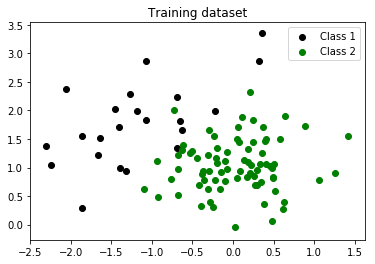

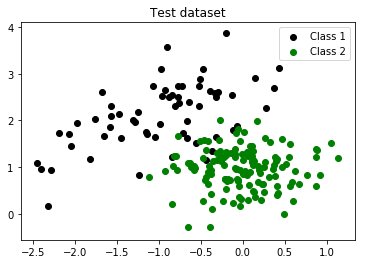

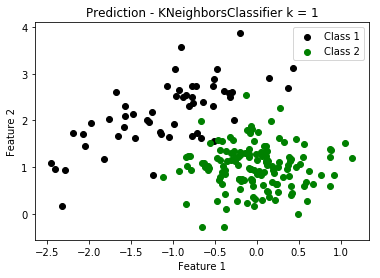

In [87]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_hat_test = knn.predict(X_test)

import matplotlib.pyplot as plt

# Plot the Training dataset
plt.scatter(X1_train[:,0], X1_train[:,1], c='k', label='Class 1')
plt.scatter(X2_train[:,0], X2_train[:,1], c='g', label='Class 2')
plt.legend()
plt.title("Training dataset")
plt.show()

# Plot the Test dataset
plt.scatter(X1_test[:,0], X1_test[:,1], c='k', label='Class 1')
plt.scatter(X2_test[:,0], X2_test[:,1], c='g', label='Class 2')
plt.legend()
plt.title("Test dataset")
plt.show()

# Plot the KNNClassifier Prediction
prediction = np.vstack((y_hat_test,X_test.T)).T
X_pred = prediction[:,1:]

indiceX1_pred = np.nonzero(prediction[:,0]==1)
indiceX2_pred = np.nonzero(prediction[:,0]==2)

X1_pred=X_pred[indiceX1_pred]
X2_pred=X_pred[indiceX2_pred]



plt.scatter(X1_pred[:,0], X1_pred[:,1], c='k', label='Class 1')
plt.scatter(X2_pred[:,0], X2_pred[:,1], c='g', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Prediction - KNeighborsClassifier k = " + str(k))
plt.show()



## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




## 1. LDA with Scikit-learn

Accuracy of the model is: 0.97


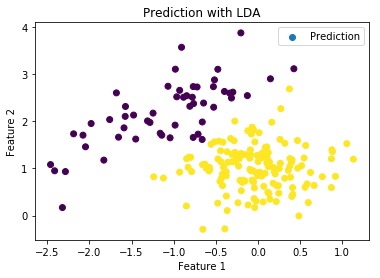

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X_train, y_train)

y_LDA = clf_LDA.predict(X_test)

print('Accuracy of the model is:', clf_LDA.score(X_test, y_test))
plt.scatter(X_test[:,0], X_test[:,1], c=y_LDA)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Prediction with LDA")
plt.show()

## 2.  QDA with Scikit-learn

Accuracy of the model is: 0.975


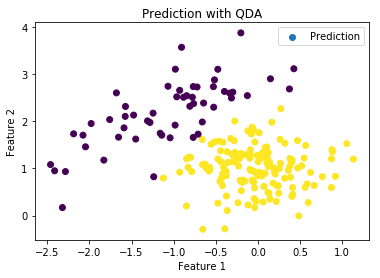

In [97]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_QDA = QuadraticDiscriminantAnalysis()
clf_QDA.fit(X_train, y_train)

y_QDA = clf_QDA.predict(X_test)

print('Accuracy of the model is:', clf_QDA.score(X_test, y_test))
plt.scatter(X_test[:,0], X_test[:,1], c=y_QDA, label='Prediction')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Prediction with QDA")
plt.show()

In [100]:
# Decision Function
Decision_Function = clf_QDA.decision_function(X_test)
# print('Output of Decision Function is:', Decision_Function)
# print('Prediction for X_test from classifier is:', y_QDA)

# To Plot the Decision Boundary.
arr1 = np.arange(X_train[:, 0].min()-1, X_train[:, 0].max()+1, 0.01)
arr2 = np.arange(X_train[:, 1].min()-1, X_train[:, 1].max()+1, 0.01)
 
xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = clf_QDA.predict(input_array)
 
plt.figure(figsize =(10, 7))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test.ravel(), alpha = 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')